# Métodos de interpolación

Este cuaderno explicará los métodos de interpolación 2D más usados por la librería de wradlib. Por tanto, esta basado fuertemente en el cuaderno de referencia de Interpolación de Wradlib. 

In [2]:
import wradlib.ipol as ipol
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Agregamos lo que representarán nuestros datos originales. Se usarán 4 puntos para interpolar los valores de una grilla de 40x40 elementos.

In [3]:
posx = np.array([4, 7, 3, 15])
posy = np.array([8, 18, 17, 3])
src = np.vstack((posx, posy)).transpose()
np.random.seed(1319622840)
vals = np.random.uniform(size=len(src))

Así como la grilla 2D en la que se encuentran:

In [4]:
xtrg = np.linspace(0, 20, 40)
ytrg = np.linspace(0, 20, 40)
trg = np.meshgrid(xtrg, ytrg)
trg = np.vstack( (trg[0].ravel(), trg[1].ravel()) ).T

In [5]:
grillabase = np.zeros(shape = (len(xtrg), len(ytrg)))
for index in range(len(posx)):
    grillabase[2 * posy[index] - 1, 2 * posx[index] - 1] = vals[index]
grillabase = np.ma.masked_values(grillabase,0)

Añadimos una gráfica para que se vean los datos que tenemos originalmente.

In [6]:
def gridplot(interpolated, title=""):
    pm = ax.pcolormesh(xtrg, ytrg, interpolated.reshape( (len(xtrg), len(ytrg)) ) )
    plt.axis("tight")
    ax.scatter(src[:, 0], src[:, 1], facecolor="None", s=50, marker='s')
    plt.title(title)
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")

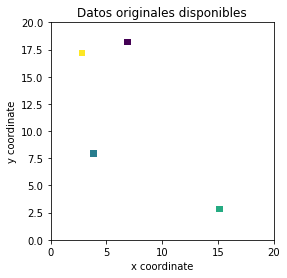

In [7]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, aspect="equal")
gridplot(grillabase.ravel(), "Datos originales disponibles")

Realizamos la interpolación de los valores restantes:

In [8]:
idw = ipol.Idw(src, trg)
nn = ipol.Nearest(src, trg)
linear = ipol.Linear(src, trg)
ok = ipol.OrdinaryKriging(src, trg)

Realizamos una pequeña función que nos ayude a graficar.

Graficamos los resultados.

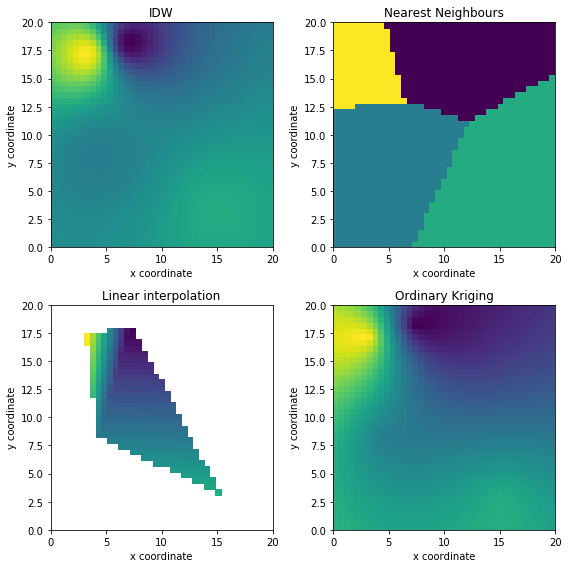

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221, aspect="equal")
gridplot(idw(vals), "IDW")
ax = fig.add_subplot(222, aspect="equal")
gridplot(nn(vals), "Nearest Neighbours")
ax = fig.add_subplot(223, aspect="equal")
gridplot(np.ma.masked_invalid(linear(vals)), "Linear interpolation")
ax = fig.add_subplot(224, aspect="equal")
gridplot(ok(vals), "Ordinary Kriging")
plt.tight_layout()

Ya con las gráficas comentemos los métodos. La interpolación lineal no basta para llenar la grilla pues no ocupa todos los valores, en ese sentido puede dejar valores sin llenar si los puntos cercanos no están disponibles. Si los puntos disponibles están muy alejados probablemente proporcione estimaciones muy pobres. El método de interpolación Nearest Neightbours no genera gradientes, por lo que será bueno para expandir valores atípicos pero siendo realistas es una estimación demasiado simplista.  

Los dos métodos restantes(Ordinary Krigging y IDW) proporcionan estimaciones con gradientes suaves y que pueden representar estimaciones buenas de interpolación. Note que el método IDW(Inverse Distant Weight) suele "clusterizar más la información original" (obviamente ligado al factor n del mismo), mientras que el Ordinary Krigging expande el radio de acción de la información en contraste. 